# Using linear features 


#Allow Drive Access

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Import Dependencies

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures

#Load Data

In [ ]:
path = '/content/drive/My Drive/Assign2/'
file = 'mnist_train.csv'
df = pd.read_csv(path+file)

## Taking a look at Data

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Choosing Features: Intensity at each pixel (could also create more sophisticated features by combining sets of features)
X, y = df.iloc[:, 1:].values, df['label'].values
df['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [ ]:
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


## Print some numbers

5


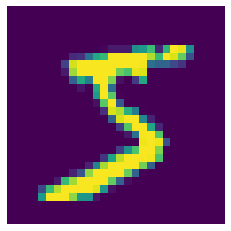

0


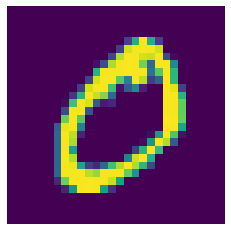

4


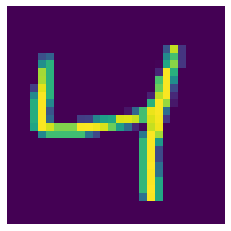

1


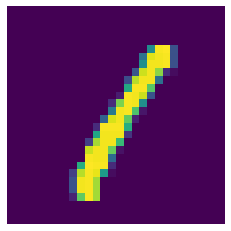

9


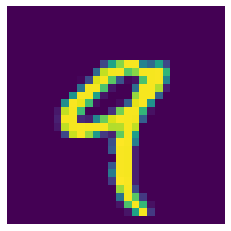

2


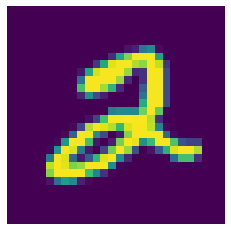

1


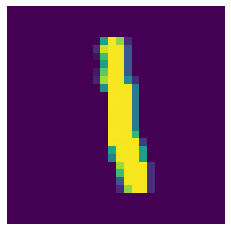

3


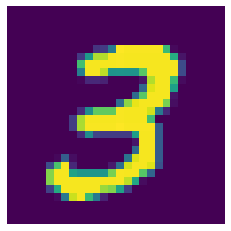

1


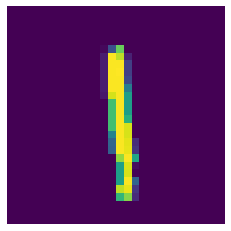

4


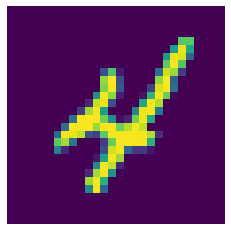

In [ ]:
for i in range(0, 10):
  print(y[i])
  some_digit = X[i]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image)#, cmap="binary")
  plt.axis("off")
  plt.show()

# Data Preprocessing

In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(X_scale.shape)
print(y.shape)

(60000, 784)
(60000,)


In [ ]:
#Training-validation Split
X_train, X_val, y_train, y_val = train_test_split(X_scale, y, train_size=.5, test_size=.5, stratify=y)

In [ ]:
len(X_train)
len(y_train)

30000

In [ ]:
print(X_train.shape)
print(y_train.shape)

(30000, 784)
(30000,)


# Running the linear features model without regularisation 

In [ ]:
t0 = time.time()

#Estimating (C is the inverse of regularization strength, i.e. higher the C is less will be regularization); l2 penalty is default
lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 1000, C = 10).fit(X_train, y_train)

#Estimating Sparse Coefficients
# lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 1000, penalty = 'l1', C = 1).fit(X_train, y_train)

t1 = time.time()

print('Training Time: ', t1 - t0)

Training Time:  63.838990211486816


# Obtaining Predictions and Evaluation on Validation Set
(You can manually tune the regularization parameter based on this)

In [ ]:
print('Training accuracy: ', lr.score(X_train, y_train))
print('Validation accuracy: ', lr.score(X_val, y_val))

#We can also manually examine incorrect examples to identify the kind of errors the algorithm is making
#to improve accuracy do we need to collect more data or find better algorithms? can be figured out by plotting learning curve

Training accuracy:  0.9135333333333333
Validation accuracy:  0.9047666666666667


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_val_predict = lr.predict(X_val)

#Predicting probabilities:
y_val_predict_p = lr.predict_proba(X_val)

print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2962
           1       0.91      0.97      0.94      3371
           2       0.91      0.86      0.89      2979
           3       0.90      0.86      0.88      3066
           4       0.89      0.93      0.91      2921
           5       0.88      0.86      0.87      2711
           6       0.93      0.95      0.94      2959
           7       0.92      0.92      0.92      3132
           8       0.88      0.83      0.86      2925
           9       0.88      0.89      0.88      2974

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000


In [ ]:
print(confusion_matrix(y_val, y_val_predict))

[[2858    4   15    6    7   23   27    6   13    3]
 [   0 3268   21    5    2   13    3    8   45    6]
 [  33   52 2573   44   57    6   53   55   88   18]
 [  20   32   80 2637    8  129   16   47   59   38]
 [   3   22   12    4 2707    3   20   10   17  123]
 [  46   29   18   85   37 2327   60   19   64   26]
 [  25   18   26    0   25   37 2807    4   17    0]
 [   9   37   29   12   43    4    1 2890    1  106]
 [  24  120   37   98   28   87   28   12 2440   51]
 [  21   15    9   47  112   16    4   94   20 2636]]


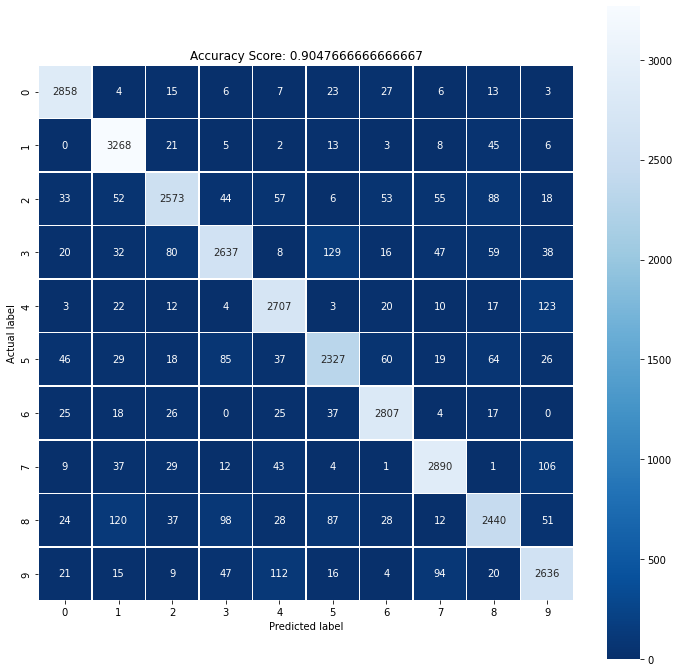

In [ ]:
#More Beautiful Confusion Matrix using seaborn
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_val, y_val_predict), annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_val, y_val))
plt.title(all_sample_title);

# Examining Coefficients and what the model learns

In [ ]:
print(lr.coef_.shape)
print(lr.coef_[0])

(10, 784)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.01168891e-04 -3.16970624e-05 -3.18669431e-04 -3.18669431e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.29386228e-04  2.64625389e-04  1.59500880e-04  3.47715217e-04
  1.67739608e-04 -7.32995033e-04 -7.59522998e-04  7.83582955e-03
  1.58837600e-02  7.20551042e-03 -4.70954264e-04  6.08631653e-03
  1.86468418e-02  1.02304741e-02 -1.70190204e-04  4.05506085e-04
  4.12391399e-04  1.61741204e-06  2.63139930e-04  2.46140014e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.87208549e-04 -3.30114392e-04
 -9.14618964e-0

0


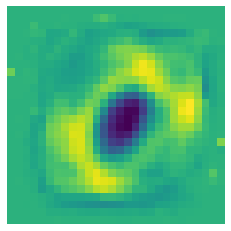

1


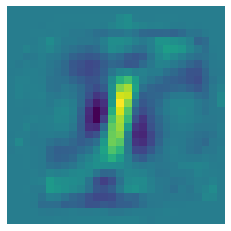

2


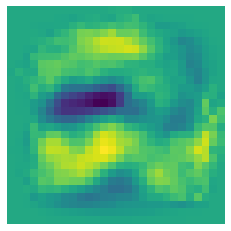

3


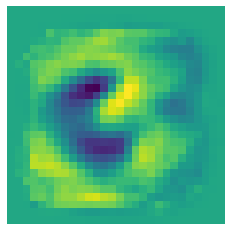

4


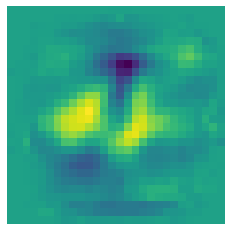

5


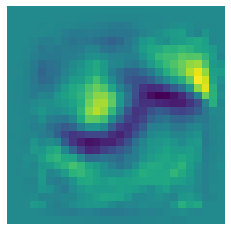

6


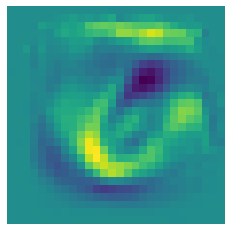

7


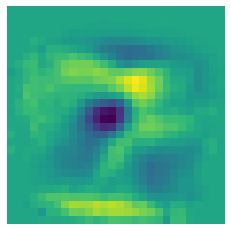

8


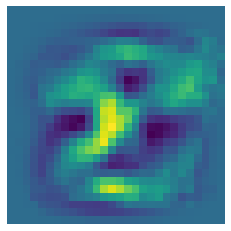

9


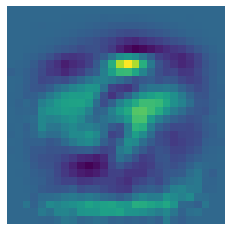

In [ ]:
for i in range(0, 10):
  print(i)
  some_digit = lr.coef_[i]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image)#, cmap="binary")
  plt.axis("off")
  plt.show()

# Error Analysis

5


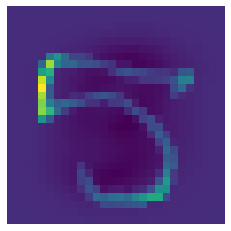

4


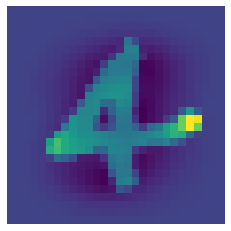

3


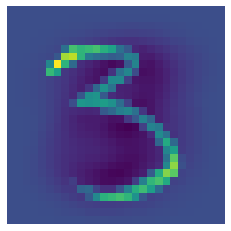

6


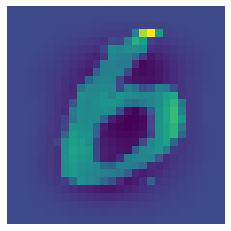

5


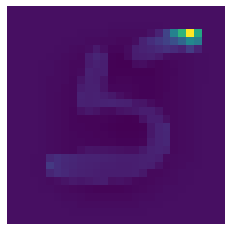

3


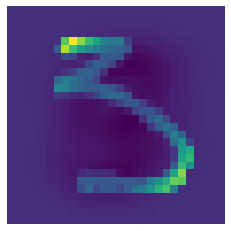

3


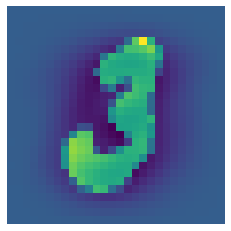

2


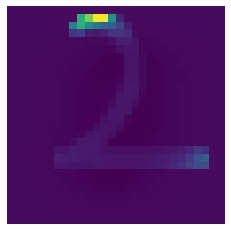

2


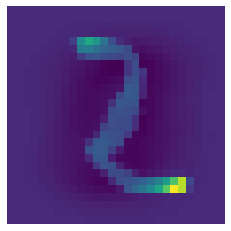

9


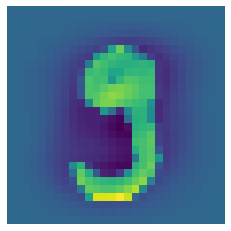

In [ ]:
dt = pd.DataFrame(X_val)
dt["actual"] = y_val
dt["predicted"] = y_val_predict
dt = dt[dt["actual"] != dt["predicted"]]
X_err, y_err = dt.iloc[:, :-2].values, dt['actual'].values

for i in range(0, 10):
  print(y_err[i])
  some_digit = X_err[i]
  some_digit_image = some_digit.reshape(28, 28)
  plt.imshow(some_digit_image)#, cmap="binary")
  plt.axis("off")
  plt.show()

# Learning Curve

In [ ]:
lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 100)
train_sizes, train_scores, valid_scores = learning_curve(lr, X, y, train_sizes=[100, 300, 1000, 3000, 10000, 30000], cv=2)

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

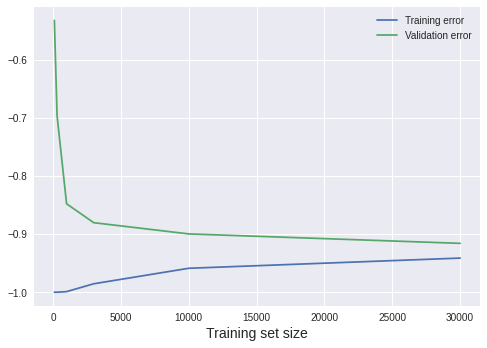

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.xlabel('Training set size', fontsize = 14)
plt.legend()
plt.show()

#Does this show high bias (underfitting) or high variance (overfitting)?

In [ ]:
lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 100)
train_sizes, train_scores, valid_scores = learning_curve(lr, X, y, train_sizes=[100, 300, 1000, 3000, 10000, 30000], cv=2)

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

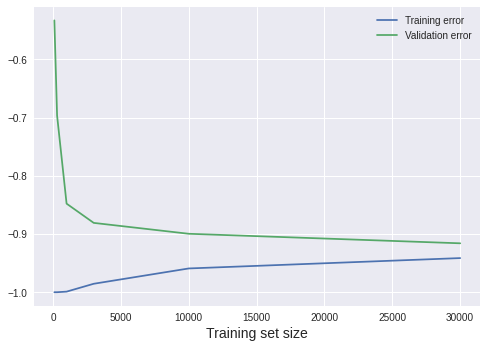

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.xlabel('Training set size', fontsize = 14)
plt.legend()
plt.show()

#Does this show high bias (underfitting) or high variance (overfitting)?

# Linear features: Grid Search for hyperparameter tuning 
(it can help in choosing the potimal regularization parameter)

In [ ]:
#Grid search:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{'C': [1, 10]},]
lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 1000)
grid_search = GridSearchCV(lr, param_grid, cv = 2, n_jobs = -1)
grid_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=2,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          solver='saga', tol=0.01),
             n_jobs=-1, param_grid=[{'C': [1, 10]}])

In [ ]:
print("Tuned hyperparameter: ", grid_search.best_params_)
print("Accuracy :", grid_search.best_score_)

Tuned hyperparameter:  {'C': 1}
Accuracy : 0.9162


# Linear features model with optimal regularisation




In [ ]:
#Finally running the best model
#best C: grid_search.best_params_

t0 = time.time()

lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 1000, C = 1).fit(X_train, y_train)

t1 = time.time()

print('Training Time: ', t1 - t0)

Training Time:  51.998380184173584


#Evaluation of the model on Test Set

In [ ]:
file = 'mnist_test.csv'
df = pd.read_csv(path+file)
X_test, y_test = df.iloc[:, 1:].values, df['label']
X_test = scaler.fit_transform(X_test)

y_test_pred = lr.predict(X_test)

Confusion matrix and accuracy

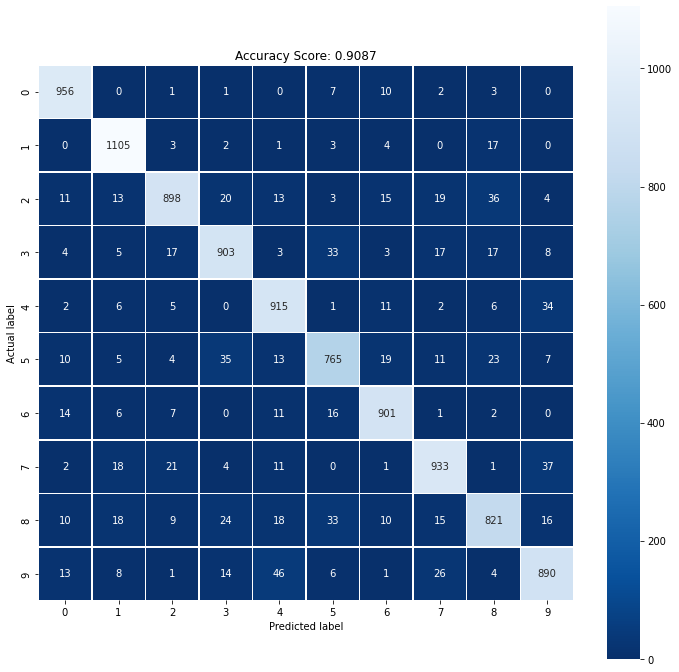

In [ ]:
#Confusion Matrix using Seaborn

plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title);

Evaluation matrix: 

In [ ]:
#Evaluation Metrics
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.93      0.97      0.95      1135
           2       0.93      0.87      0.90      1032
           3       0.90      0.89      0.90      1010
           4       0.89      0.93      0.91       982
           5       0.88      0.86      0.87       892
           6       0.92      0.94      0.93       958
           7       0.91      0.91      0.91      1028
           8       0.88      0.84      0.86       974
           9       0.89      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Plotting the learning curve:

In [ ]:
lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 1000)
train_sizes, train_scores, valid_scores = learning_curve(lr, X, y, train_sizes=[100, 300, 1000, 3000, 10000, 30000], cv=2)

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

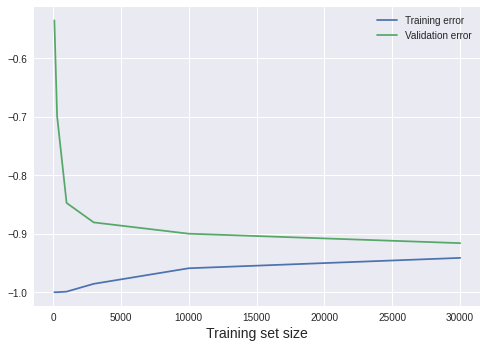

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.xlabel('Training set size', fontsize = 14)
plt.legend()
plt.show()

#Does this show high bias (underfitting) or high variance (overfitting)?

# Using polynomial features




1.   Here, the data dimension creates a problem when I run this implementation in colab. The kernel crashes as a result of an overloaded RAM. To solve this, I use PCA to reduce the data dimension
2.   In addition, since I use PCA, PCA is affected by scale, so I needed to scale the features in your data before applying PCA




# Code for polynomial features

Take a look at data

In [ ]:
print(X.shape)
print(X_scale.shape)
print(y.shape)


(60000, 784)
(60000, 784)
(60000,)


Below I opt to use PCA to reduce the data dimension. The dimension is pretty large and breaking my RAM. Again it is quite important to mention that I will use the scaled data with the variable X_Scale

In [ ]:
#Training-validation Split
X_train, X_val, y_train, y_val = train_test_split(X_scale, y, train_size=.5, test_size=.5, stratify=y)

print(X_train.shape)
print(y_train.shape)

(30000, 784)
(30000,)


PCA implementation:

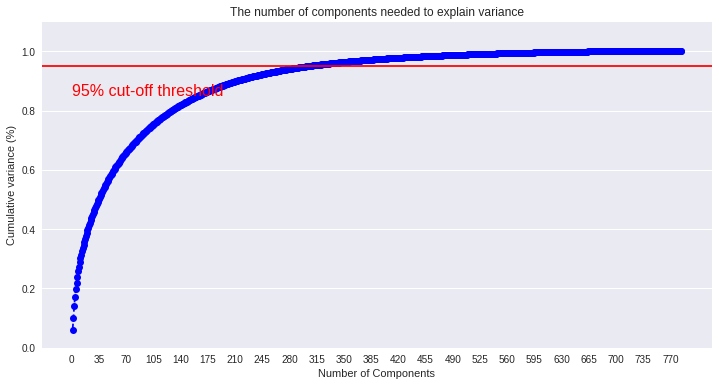

In [ ]:
#PCA implementation and also Figuring out the right number of components: 

from sklearn.decomposition import PCA
from shapely.geometry import LineString
import numpy as np


pca = PCA().fit(X_train)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 785, step=35)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

#Finding the intesection point 


Number of optimal components to be used = 280 !! However, this still crashes colab RAM. Therefore, I am opting the highest variance which will give me a number that does not crash my RAM (Pretty sad about my PC). That is 80 % variance which gives me optimal 129 components

In [ ]:
#implementing PCA
pca = PCA(0.80)
pca.fit(X_train)
reduced = pca.transform(X_train)
print(X_scale.shape)
print(reduced.shape)

principalDf = pd.DataFrame(data = reduced)
principalDf.shape


(60000, 784)
(30000, 129)


(30000, 129)

In [ ]:
#Transforming data 

X_poly = PolynomialFeatures(degree = 2,include_bias = False).fit_transform(reduced)
X_poly.shape
print(y.shape)
print(X_poly.shape)

(784,)
(30000, 8514)


In [ ]:
print(y_train.shape)
print(X_train.shape)

(30000,)
(30000, 784)


The polynomial features may be computationally expensive. I need to be careful with parameters. Hence, I resort to using standard maximum iterations 100 and the best penalty to be used is l2. The solver will remain as Saga. 

Searching for the best penalty to be used: 

In [ ]:
penalty = ['l1', 'l2', 'elasticnet' ]
param_grid = dict(penalty=penalty)


lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 100 )

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 2, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_poly, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver lb

Best: 0.957233 using {'penalty': 'l2'}
Execution time: 584.4453344345093 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Important Note: There is no need to run the polynomial features without using regularization. This will crash my RAM and take unnecessary hours. Therefore unlike for linear features, I did not run the polynomial features model without regularization. Hence, I proceed to: 

Searching the optimal regularisation parameter for the polynomial features:


In [ ]:
# Grid search

#Grid search:
from sklearn.model_selection import GridSearchCV

t0 = time.time()

param_grid = [{'C': [1, 10]},]
lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = 100)
grid_search = GridSearchCV(lr, param_grid, cv = 2, n_jobs = -1)
grid_search.fit(X_poly, y_train)

t1 = time.time()

print('Time taken: ', t1 - t0)

print("Tuned hyperparameter: ", grid_search.best_params_)
print("Accuracy :", grid_search.best_score_)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Time taken:  3601.053134202957
Tuned hyperparameter:  {'C': 1}
Accuracy : 0.6881333333333333


Running the model with all the best hyperparameters

In [ ]:
# Running the model 

t0 = time.time()

lr = LogisticRegression(n_jobs = -1, penalty = 'l2' , solver = 'saga', C= 1, max_iter= 100).fit(X_poly,y_train) 
#the dataset is big, the model can take more time and crash the RAM. 

t1 = time.time()

print('Training Time: ', t1 - t0)

Training Time:  1549.7436265945435


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Plotting the prediction:

<function matplotlib.pyplot.show>

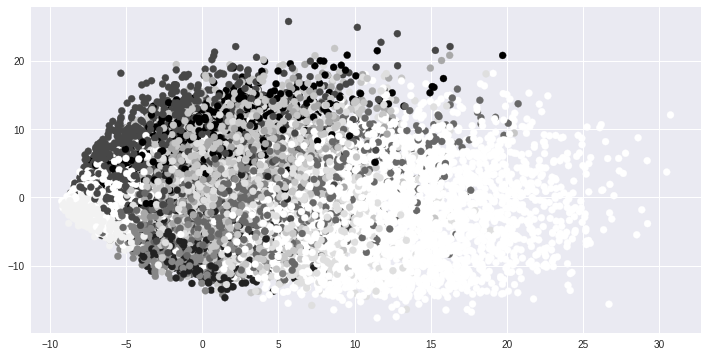

In [41]:
#plotting the prediction 

y_pred = lr.predict(X_poly)
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=y_pred)
plt.show

Evaluation metrics:

In [42]:
#Evaluation matrics

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.93      0.97      0.95      1135
           2       0.93      0.87      0.90      1032
           3       0.90      0.89      0.90      1010
           4       0.89      0.93      0.91       982
           5       0.88      0.86      0.87       892
           6       0.92      0.94      0.93       958
           7       0.91      0.91      0.91      1028
           8       0.88      0.84      0.86       974
           9       0.89      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Evaluating the polynomial features model on the test set


In [43]:
file = 'mnist_test.csv'
df = pd.read_csv(path+file)
X_test, y_test = df.iloc[:, 1:].values, df['label']
X_test = scaler.fit_transform(X_test)

y_test_pred = lr.predict(X_test)

ValueError: ignored

Confusion Matrix: 

ValueError: ignored

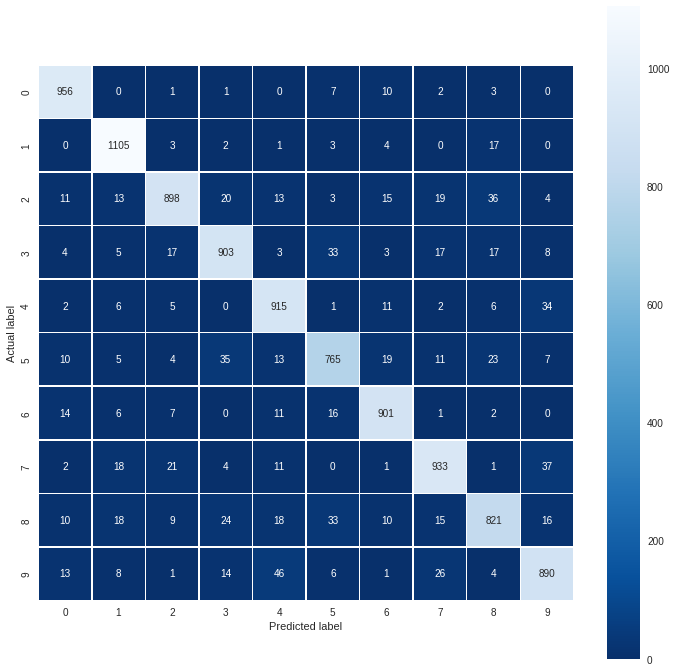

In [44]:
#Confusion Matrix using Seaborn

plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title);

Plotting a learning curve for the polynomial features model

In [ ]:
lr = LogisticRegression(n_jobs = -1, solver="saga", tol = .01, max_iter = )
train_sizes, train_scores, valid_scores = learning_curve(lr, X, y, train_sizes=[100, 300, 1000, 3000, 10000, 30000], cv=2)

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.xlabel('Training set size', fontsize = 14)
plt.legend()
plt.show()

#Does this show high bias (underfitting) or high variance (overfitting)?